In [1]:
# ! pip install tqdm 

In [2]:
import pyopenpose as op
import cv2
import time
import numpy as np
import os
import json
import sys

from matplotlib import pyplot as plt
from tqdm import tqdm

try:
    from myOpenpose import *
    from transform import *
except:
    sys.path.append('/home/nmiguens/Python')
    from myOpenpose import *
    from transform import *

In [3]:
# Process Image -> Keypoints

datasets = "/home/nmiguens/Datasets/lsa16_raw"
jsonFiles = "/home/nmiguens/JSON/LSA16_hand+body_DefaultParam"

imagePaths = op.get_images_on_directory(datasets)
X = jsonDir_2_matrixNumpy(jsonFiles, body = False, hand = True, face = False)

100%|██████████| 800/800 [00:02<00:00, 281.50it/s]


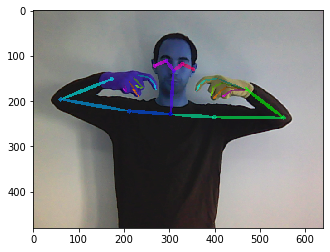

In [4]:
# Exemple de pose

imageId = 301

params = set_params(body = 1, hand = True, hand_detector = 0, hand_opti = True)
opImage_display(imagePaths[imageId], params)

In [5]:
# SVMs
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split,  ShuffleSplit
from sklearn.metrics import plot_confusion_matrix


# Split in train and test set
X, y = np.array(X), transform_Path2Class(imagePaths)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

# SVC
clf = make_pipeline(StandardScaler(), svm.SVC())
classifier = clf.fit(X_train, y_train)

# Cross-Validation
clf = make_pipeline(StandardScaler(), svm.SVC())
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.28 (+/- 0.06)


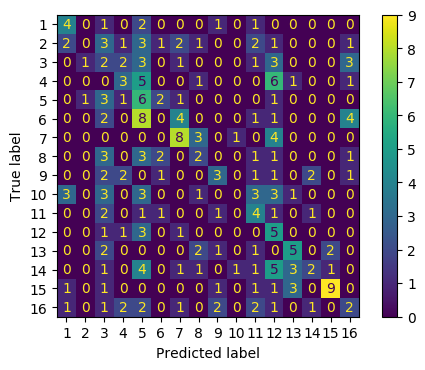

In [6]:
disp = plot_confusion_matrix(classifier, X_test, y_test, normalize= None)
# print(disp.confusion_matrix)
disp.figure_.dpi = 100
plt.show()

In [7]:
imagePaths

['/home/nmiguens/Datasets/lsa16_raw/1_1_1.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_1_2.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_1_3.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_1_4.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_1_5.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_2_1.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_2_2.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_2_3.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_2_4.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_2_5.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_3_1.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_3_2.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_3_3.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_3_4.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_3_5.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_4_1.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_4_2.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_4_3.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_4_4.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_4_5.png',
 '/home/nmiguens/Datasets/lsa16_raw/1_5_

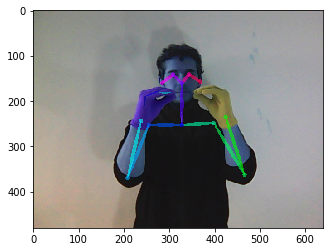

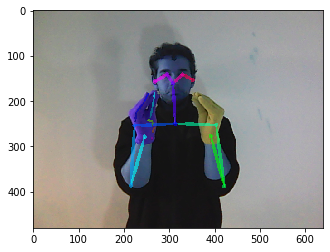

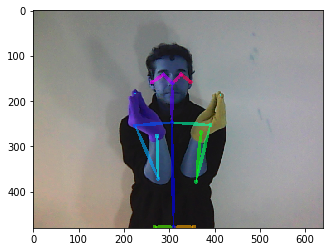

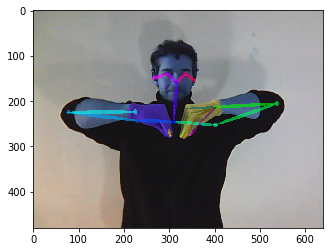

In [8]:
for i in range(1,5):
    image = '/home/nmiguens/Datasets/lsa16_raw/12_5_{}.png'.format(i)
    opImage_display(image, params)

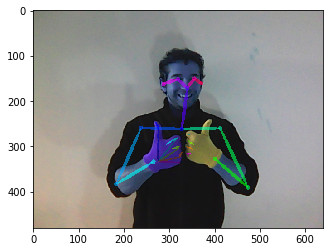

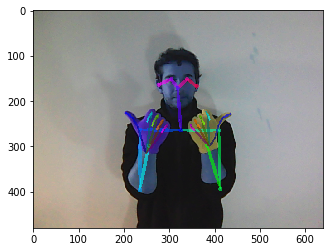

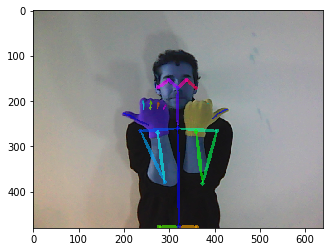

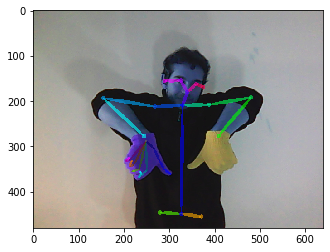

In [9]:
for i in range(1,5):
    image = '/home/nmiguens/Datasets/lsa16_raw/13_5_{}.png'.format(i)
    opImage_display(image, params)